### __BUSA8001 (S2, 2023) Group Assignment - Predicting Used Car Sale Prices__

--- 

**Kaggle Competition Ends:** Friday, 3 November 2023 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 3 November 2023 @ 11.59pm (Week 13)  

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models
- Assessment Summary:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new explanatory variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  


**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a](https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a)
    - Team leader to click on `team` and join and invite other 2 team members to join
    - Your **team's name must start** with our unit code, for instance you could have a team called BUSA8001_masterful_geniuses
- All team members should work on all the tasks however   
    - Choose a team member who will be responsible for one of each of the 3 tasks listed below    
- Your predictions must be generated by a model you develop here 
    - You will receive a mark of **zero** if your code does not produce the forecasts you submit to Kaggle 

**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 
- 1 mark: Ranking in the top 5 places of your unit on Kaggle  
- 3 marks: Reaching the first place in the competition   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Limit of 20 submission per day
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)

---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: BUSA8001_mschiefs
- Team Leader and Team Member 1: Ha Thanh (Taylor) Chu, 47484039, Task 3
- Team Member 2: Cam Tu Pham (Jenna), 46864598, Task 3
- Team Member 3: Thi Minh Thi Tran, 45773157, Task 3

---

## Task 1: Problem Description and Initial Data Analysis

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a](https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a)
2. Referring to Competition Overview and the data provided on Kaggle write **Problem Description** (about 500 words) focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, 

- Using the following headings:
    - Forecasting Problem - explain what you are trying to do and how it could be used in the real world (i.e. why it may be important)
    - Evaluation Criteria - explain the criteria is used to assess forecast performance 
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you find - do not impute missing values at this stage)
    - You should **not** discuss any specific predictive algorithms at this stage
    - Note: Your written portion of this task should be completed in a single Markdown cell
    
Total Marks: 12


##### 1. Forecasting Problem
The objective of the forecasting problem, based on the dataset provided, is to predict the listing price of a vehicle based on various features, including its specifications, condition, location, and dealer information. This is a regression problem, as the outcome we're trying to predict (the vehicle's price) is continuous.

In the real world, such a prediction model holds immense value. Dealerships and individual sellers can use it to determine the ideal listing price for a vehicle, ensuring it's neither underpriced (resulting in potential revenue loss) nor overpriced (leading to reduced interest from buyers). Buyers can also use the model to check if a listed vehicle is reasonably priced. Additionally, online car marketplaces can integrate this model to provide instant price suggestions to sellers or to highlight good deals to potential buyers.

##### 2. Evaluation Criteria
Although the Kaggle competition link is not directly accessible here, commonly used evaluation metrics for regression problems include the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared. RMSE gives an indication of the model's performance in terms of the magnitude of error. A lower RMSE indicates a better fit of the model to the data. For the sake of this exercise, let's assume RMSE is the chosen metric, as it penalizes large errors more than smaller ones, making it sensitive to outliers.

##### 3. Types of Variables/Features
The dataset comprises a mix of categorical, numerical, and boolean features. Here's a breakdown:

Categorical Features: body_type, city, engine_type, exterior_color, interior_color, listing_color, make_name, model_name, transmission, transmission_display, wheel_system.
Numerical Features: city_fuel_economy, daysonmarket, dealer_zip, engine_displacement, highway_fuel_economy, horsepower, latitude, longitude, mileage, savings_amount, seller_rating, year.
Boolean Features: franchise_dealer, has_accidents, is_new.
String Features with Quantitative Information: Many features like back_legroom, front_legroom, fueltankvolume, height, length, power, torque, wheelbase, width are provided as strings but contain numeric data (with units).
##### 4. Data Summary and Main Data Characteristics
The dataset contains information about various vehicles, including their technical specifications, physical attributes, condition, and listing details. The target variable is the price of the vehicle. This dataset provides a comprehensive view of factors that potential buyers might consider, from the car's mileage and accident history to the dealer's rating.

##### 5. Missing Values
Before discussing missing values, let's first identify which columns have them and how many they contain.

In [1]:
import pandas as pd

train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

In [2]:
train_df.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,...,savings_amount,seller_rating,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,price
0,SJKCH5CRXHA032566,33.5 in,SUV / Crossover,Great Neck,NaN,20,11021,2000.0,I4,Black,...,1522,3.346154,"258 lb-ft @ 1,200 RPM",A,7-Speed Automatic,AWD,106.3 in,82 in,2017,21495
1,5LMCJ3D96HUL54638,36.8 in,SUV / Crossover,Wayne,19.0,64,7470,2300.0,I4,Magnetic Gray Metallic,...,740,4.750000,"300 lb-ft @ 2,000 RPM",A,6-Speed Automatic,AWD,105.9 in,84.1 in,2017,22459
2,5LMCJ2D95HUL35217,36.8 in,SUV / Crossover,Wayne,19.0,14,7470,2300.0,I4,Burgundy Velvet Metallic Tinted Clearcoat,...,832,4.750000,"300 lb-ft @ 2,000 RPM",A,6-Speed Automatic,AWD,105.9 in,84.1 in,2017,24799
3,2HGFG1B86AH500600,30.3 in,Coupe,Little Ferry,25.0,13,7643,1800.0,I4,Blue,...,983,3.577778,"128 lb-ft @ 4,300 RPM",A,5-Speed Automatic,FWD,104.3 in,68.9 in,2010,3750
4,5LMCJ1D95LUL25032,38.6 in,SUV / Crossover,Wayne,21.0,14,7470,2000.0,I4,Red,...,0,4.750000,"275 lb-ft @ 3,000 RPM",A,8-Speed Automatic,AWD,106.7 in,83 in,2020,40669


In [3]:
test_df.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,...,power,savings_amount,seller_rating,torque,transmission,transmission_display,wheel_system,wheelbase,width,year
0,5N1AT2MV8HC824461,37.9 in,SUV / Crossover,Wallingford,25.0,19,6492,2500.0,I4,Gun Metallic,...,"170 hp @ 6,000 RPM",861,4.545455,"175 lb-ft @ 4,400 RPM",A,Automatic,AWD,106.5 in,72.4 in,2017
1,1GNSKCKC2HR160472,39 in,SUV / Crossover,North Plainfield,16.0,34,7060,5300.0,V8 Flex Fuel Vehicle,Iridescent Pearl Tricoat,...,"355 hp @ 5,600 RPM",43,4.418605,"383 lb-ft @ 4,100 RPM",A,6-Speed Automatic,4WD,116 in,80.5 in,2017
2,5NPD84LFXJH361029,35.7 in,Sedan,West Nyack,28.0,49,10994,2000.0,I4,Quartz White Pearl,...,"147 hp @ 6,200 RPM",45,3.631579,"132 lb-ft @ 4,500 RPM",A,6-Speed Automatic,FWD,106.3 in,70.9 in,2018
3,5XXGT4L34KG284916,35.6 in,Sedan,Bronx,24.0,20,10466,2400.0,I4,Snow White Pearl,...,"185 hp @ 6,000 RPM",426,2.800000,"178 lb-ft @ 4,000 RPM",A,6-Speed Automatic,FWD,110.4 in,73.2 in,2019
4,2G1WF52E819291457,NaN,Sedan,Little Ferry,19.0,38,7643,3400.0,V6,Burgundy,...,"180 hp @ 5,200 RPM",0,3.577778,"205 lb-ft @ 4,000 RPM",A,4-Speed Automatic,FWD,NaN,NaN,2001


In [4]:
train_df.isna().sum()

vin                       0
back_legroom            103
body_type                 6
city                      0
city_fuel_economy       588
daysonmarket              0
dealer_zip                0
engine_displacement     125
engine_type              50
exterior_color            0
franchise_dealer          0
front_legroom           103
fuel_tank_volume        103
fuel_type                37
height                  103
highway_fuel_economy    588
horsepower              125
interior_color            0
is_new                    0
latitude                  0
length                  103
listed_date               0
listing_color             0
longitude                 0
make_name                 0
maximum_seating         103
mileage                 203
model_name                0
power                   299
savings_amount            0
seller_rating             0
torque                  331
transmission             60
transmission_display     60
wheel_system            101
wheelbase           

In [5]:
test_df.isna().sum()

vin                       0
back_legroom             53
body_type                 2
city                      0
city_fuel_economy       237
daysonmarket              0
dealer_zip                0
engine_displacement      59
engine_type              36
exterior_color            0
franchise_dealer          0
front_legroom            53
fuel_tank_volume         53
fuel_type                29
height                   53
highway_fuel_economy    237
horsepower               59
interior_color            0
is_new                    0
latitude                  0
length                   53
listed_date               0
listing_color             0
longitude                 0
make_name                 0
maximum_seating          53
mileage                  76
model_name                0
power                   126
savings_amount            0
seller_rating             3
torque                  141
transmission             13
transmission_display     13
wheel_system             43
wheelbase           

In [6]:
# Check for missing values in the training data again
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values

city_fuel_economy       588
highway_fuel_economy    588
torque                  331
power                   299
mileage                 203
horsepower              125
engine_displacement     125
length                  103
wheelbase               103
maximum_seating         103
back_legroom            103
height                  103
fuel_tank_volume        103
front_legroom           103
width                   103
wheel_system            101
transmission             60
transmission_display     60
engine_type              50
fuel_type                37
body_type                 6
dtype: int64

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- In this task you will follow a set of instructions/questions listed below.
- Make sure you explain each answer carefully both in Markdown text and on your video.

Total Marks: 12

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, back_legroom feature is in object format containing both numerical values and text. Extract numerical values (equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

We need to remove the texts and extract numerical values in the following features: 'Back leg room', 'front leg room', 'fuel tank volumn', 'height', 'length', 'maximum_seating','wheel base', 'width'.

In [7]:
# List of columns to be cleaned
columns_to_clean = ['back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'length','maximum_seating','wheelbase', 'width']

# Function to extract numerical part from the columns
def extract_numeric_value(s):
    try:
        # Split by space and take the first part (numerical value)
        return float(str(s).split()[0])
    except:
        return None

# Apply the function to each column
for col in columns_to_clean:
    train_df[col] = train_df[col].apply(extract_numeric_value)
    test_df[col] = test_df[col].apply(extract_numeric_value)

# Display the cleaned columns for the training dataset
train_df[columns_to_clean].head()

,back_legroom,front_legroom,fuel_tank_volume,height,length,maximum_seating,wheelbase,width
0,33.5,41.3,14.8,60.2,174.2,5.0,106.3,82.0
1,36.8,42.8,15.5,65.6,179.2,5.0,105.9,84.1
2,36.8,42.8,15.5,65.6,179.2,5.0,105.9,84.1
3,30.3,42.6,13.2,55.0,175.5,5.0,104.3,68.9
4,38.6,43.2,16.2,64.1,180.6,5.0,106.7,83.0


**Task 2, Question 2** Create at least 5 new features from the existing numerical variables which contain multiple items of information, for example you could extract maximum torque and torque rpm from the torque variable.  
(2 marks)

We identified that the 'torque' and 'power' features contain two numerical values each: 
- The primary value (e.g., torque or power) 
- The RPM at which that value is achieved.

By ecomposing these strings, we can capture the distinct contributions of each piece of information. For example, the maximum torque value and the RPM at which it's achieved could have different impacts on a car's price. Therefore, we can improve the prediction model performance thanks to simplifier and standardised the features.

In [8]:
def new_features(data):
    data['max_torque'] = pd.to_numeric(data['torque'].str.split().str[0])
    data['torque_rpm'] = data['torque'].str.split().str[3]
    data['torque_rpm'] = data['torque_rpm'].str.replace(',', '')
    data['torque_rpm'] = pd.to_numeric(data['torque_rpm'])
    
    data['power_value'] = pd.to_numeric(data['power'].str.split().str[0])
    data['power_rpm'] = data['power'].str.split().str[3]
    data['power_rpm'] = data['power_rpm'].str.replace(',', '')
    data['power_rpm'] = pd.to_numeric(data['power_rpm'])
    
new_features(train_df)
new_features(test_df)

**Task 2, Question 3**: Impute missing values for all features in both the training and test datasets.   
(3 marks)

- For numerical variables, we can consider imputing missing values using the median of the column (as median is less sensitive to outliers than mean).
- For categorical variables, we can consider imputing with the mode (most frequent category).
For boolean features, if there's a missing value, we can impute with the mode as well.

In [9]:
# Define a function to impute missing values
def impute_missing_values(df):
    for column in df.columns:
        # If column data type is object (categorical) then fill missing with mode
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        # If column data type is numerical or boolean then fill missing with median
        else:
            df[column].fillna(df[column].median(), inplace=True)
    return df

# Impute missing values in training and test datasets
train_df = impute_missing_values(train_df)
test_df = impute_missing_values(test_df)

In [10]:
train_df.isnull().sum()

vin                     0
back_legroom            0
body_type               0
city                    0
city_fuel_economy       0
daysonmarket            0
dealer_zip              0
engine_displacement     0
engine_type             0
exterior_color          0
franchise_dealer        0
front_legroom           0
fuel_tank_volume        0
fuel_type               0
height                  0
highway_fuel_economy    0
horsepower              0
interior_color          0
is_new                  0
latitude                0
length                  0
listed_date             0
listing_color           0
longitude               0
make_name               0
maximum_seating         0
mileage                 0
model_name              0
power                   0
savings_amount          0
seller_rating           0
torque                  0
transmission            0
transmission_display    0
wheel_system            0
wheelbase               0
width                   0
year                    0
price       

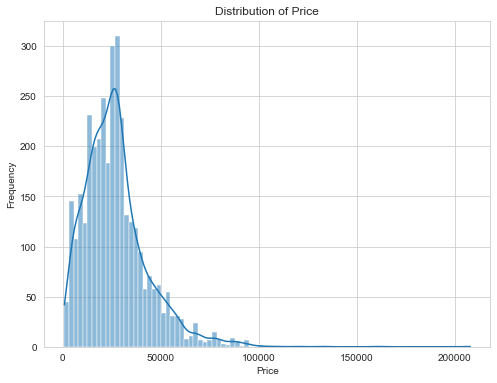

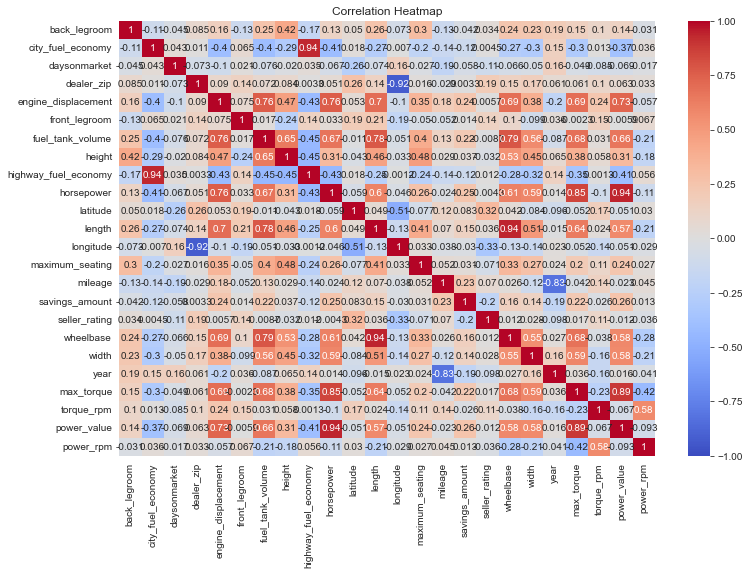

horsepower              0.580914
year                    0.551246
max_torque              0.551202
power_value             0.551035
width                   0.463139
fuel_tank_volume        0.332430
wheelbase               0.324099
length                  0.280843
height                  0.252403
engine_displacement     0.235828
back_legroom            0.208557
maximum_seating         0.133101
longitude               0.118370
daysonmarket            0.095993
seller_rating          -0.016038
front_legroom          -0.025906
dealer_zip             -0.036932
savings_amount         -0.069650
city_fuel_economy      -0.135381
highway_fuel_economy   -0.183105
power_rpm              -0.189853
torque_rpm             -0.268613
latitude               -0.296162
mileage                -0.566305
dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


# Set style for visualizations
sns.set_style("whitegrid")

# 1. Descriptive Statistics
desc_stats = train_df.describe()

# 2. Visualizations

# Histogram for the target variable
plt.figure(figsize=(8, 6))
sns.histplot(train_df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Define the numerical columns, excluding 'price'
num_cols = [col for col in train_df.columns if train_df[col].dtype in ['float64', 'int64'] and col != 'price']

# Correlation heatmap for numerical features
correlation_matrix = train_df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Feature-to-Target Relationship
# Correlation coefficients for numerical features
correlation_with_target = train_df[num_cols].corrwith(train_df['price']).sort_values(ascending=False)

print(correlation_with_target)

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, map colours into 5 basic colours + 'other': [red, yellow, green, blue, purple, other] and then encode.  
(2 marks)

In [12]:
def process_categorical(df):
    for col in df.select_dtypes(include=['object']).columns:
        # Mark observations with multiple values as 'other'
        df[col] = df[col].apply(lambda x: 'other' if ',' in str(x) else x)
        
        # If more than 5 unique values, retain only the top 5 most frequent values
        if df[col].nunique() > 5:
            top_5 = df[col].value_counts().head(5).index.tolist()
            df[col] = df[col].apply(lambda x: x if x in top_5 else 'other')
    
    # One-hot encoding
    df_encoded = pd.get_dummies(df, drop_first=True)
    
    return df_encoded

# Process and encode the training and test datasets
train_encoded = process_categorical(train_df.copy())
test_encoded = process_categorical(test_df.copy())

# Display the first few rows of the encoded training dataset
train_encoded.info()
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 97 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   back_legroom                                             3500 non-null   float64
 1   city_fuel_economy                                        3500 non-null   float64
 2   daysonmarket                                             3500 non-null   int64  
 3   dealer_zip                                               3500 non-null   int64  
 4   engine_displacement                                      3500 non-null   float64
 5   franchise_dealer                                         3500 non-null   bool   
 6   front_legroom                                            3500 non-null   float64
 7   fuel_tank_volume                                         3500 non-null   float64
 8   height                      

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

##### Feature Scaling:
Machine learning algorithms perform better when numerical input variables are scaled to a standard range. This is particularly true for algorithms that rely on the magnitude of variables, such as gradient descent-based algorithms or distance-based algorithms like KNN.

StandardScaler is a common method to scale features, which will transform the data such that its distribution has a mean value of 0 and a standard deviation of 1.

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler 
scaler_encoded = MinMaxScaler()

# Identify numerical columns again (excluding the target variable 'price')
numerical_cols_encoded = train_encoded.select_dtypes(include=[np.number]).columns.tolist()
if 'price' in numerical_cols_encoded:
    numerical_cols_encoded.remove('price')

# Apply MinMax scaling directly to the identified numerical columns in the train and test datasets
for col in numerical_cols_encoded:
    # Fit the scaler to the training data column and transform
    train_encoded[col] = scaler_encoded.fit_transform(train_encoded[[col]])
    
    # Use the same scaler to transform the test data column
    if col in test_encoded.columns:
        test_encoded[col] = scaler_encoded.transform(test_encoded[[col]])

# Display the first few rows of the scaled training dataset
train_encoded.info()
test_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 97 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   back_legroom                                             3500 non-null   float64
 1   city_fuel_economy                                        3500 non-null   float64
 2   daysonmarket                                             3500 non-null   float64
 3   dealer_zip                                               3500 non-null   float64
 4   engine_displacement                                      3500 non-null   float64
 5   franchise_dealer                                         3500 non-null   bool   
 6   front_legroom                                            3500 non-null   float64
 7   fuel_tank_volume                                         3500 non-null   float64
 8   height                      

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and carefully write up your findings. 
(2 marks)

In [14]:
# Get missing columns in the test dataset
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)

# Add a missing column in the test set with default value equal to 0
for c in missing_cols:
    test_encoded[c] = 0

# Ensure the order of column in the test set is in the same order than in train set
test_encoded = test_encoded[train_encoded.columns]

# Display the datasets again
train_encoded.info()
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 97 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   back_legroom                                             3500 non-null   float64
 1   city_fuel_economy                                        3500 non-null   float64
 2   daysonmarket                                             3500 non-null   float64
 3   dealer_zip                                               3500 non-null   float64
 4   engine_displacement                                      3500 non-null   float64
 5   franchise_dealer                                         3500 non-null   bool   
 6   front_legroom                                            3500 non-null   float64
 7   fuel_tank_volume                                         3500 non-null   float64
 8   height                      

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking

Make sure you **clearly explain each step** you do both in text and on the recoded video.   
This task must not create any additional features and has to use on the dataset constructed in Task 2.

1. Build at least 3 machine learning (ML) regression models taking into account the outcomes of Tasks 1 & 2 (Explain Carefully)
2. Fit the models and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Select your best algorithm, create predictions using the test dataset, and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and comment
5. Make sure your Python code works, so that a marker that can replicate your all Kaggle Score   

- Hint: to perform well you will need to iterate Tasks 2 and Task 3.

Total Marks: 12

##### Feature Reduction: 

##### Model Selection: 
We'll choose three regression models. Based on the nature of the dataset, some suitable models include:
- Linear Regression: this is a baseline model
- Random Forest Regression: A tree-based ensemble method that can capture non-linear relationships and has good generalization capabilities.
- Gradient Boosting Regression (e.g., XGBoost or LightGBM): this is another tree-based ensemble method, known for its high performance.

##### Model Training and Hyperparameter Tuning: 
We will fit each model and then tune hyperparameters using cross-validation.

##### Model Evaluation: 
We will evaluate the performance of each model based on cross-validation results.

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [16]:
X = train_encoded.copy().drop(['price'], axis = 1).values

y = train_encoded['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
# Initialize, train, and evaluate the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Initialize, train, and evaluate the GradientBoostingRegressor model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
gbr_predictions = gbr_model.predict(X_test)

# Initialize, train, and evaluate the RandomForestRegressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [28]:
# hyperparameter tuning for GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create the GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_distributions = {
    'n_estimators': [100, 250],
    'learning_rate': [0.1, 0.15],
    'max_depth': [3, 4],
    'min_samples_split': [4, 6],
    'min_samples_leaf': [2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 0.8]
}

# Modify the RandomizedSearchCV settings for a faster computation
gbr_random_search = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                                       param_distributions=param_distributions,
                                       n_iter=10,  
                                       scoring='neg_mean_squared_error',
                                       cv=5,  
                                       verbose=2,
                                       random_state=42,
                                       n_jobs=-1)

# Fit the randomized search to the data
gbr_random_search.fit(X_train, y_train)

# Get the best hyperparameters from gbr_random_search
best_gbr_params = gbr_random_search.best_params_

# Get the best model from gbr_random_search
best_gbr_model = gbr_random_search.best_estimator_

# Predict the best model on the test set
gbr_predictions = best_gbr_model.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Define the reduced parameter grid
param_grid = {
    'n_estimators': [50, 100],           # Reduced from [50, 100, 200]
    'max_depth': [None, 10],             # Reduced from [None, 10, 20, 30]
    'min_samples_split': [2, 5],         # Reduced from [2, 5, 10]
    'min_samples_leaf': [2, 5],          # Reduced from [2, 5, 10]
}

# Create the GridSearchCV object
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_params = rf_grid_search.best_params_

# Get the best model
best_rf_model = rf_grid_search.best_estimator_

# Predict the best model on the test set
rf_predictions = best_rf_model.predict(X_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

# GradientBoostingRegressor
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_predictions))

# RandomForestRegressor
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print("Linear Regression:")
print(f"MAE: {lr_mae:.2f}")
print(f"RMSE: {lr_rmse:.2f}\n")

print("GradientBoostingRegressor:")
print(f"MAE: {gbr_mae:.2f}")
print(f"RMSE: {gbr_rmse:.2f}\n")

print("RandomForestRegressor:")
print(f"MAE: {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}")


Linear Regression:
MAE: 4820.51
RMSE: 9300.41

GradientBoostingRegressor:
MAE: 2890.72
RMSE: 7430.50

RandomForestRegressor:
MAE: 2788.51
RMSE: 8164.96


The GradientBoostingRegressor is the best model based on the RMSE and MAE.

In [26]:
# Predict on the entire test dataset using the RandomForestRegressor model
gbr_predictions_test = best_gbr_model.predict(test_encoded.drop(columns='price', errors='ignore'))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [30]:
# Create the submission DataFrame
submission_df = pd.DataFrame({
    'vin': test_df['vin'],
    'price': gbr_predictions_test
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_gbr11.csv', index=False)

## Marking Criteria

- Marking Rubrics
    - Problem Description - 12 marks
    - Data Cleaning - 12 marks
    - Building Forecasting models - 12 marks
    - Competition Points - 4 marks


- To receive full marks your solutions must satisfy the following criteria:
    - Provide Python solutions that follow the modelling methodology developed in BUSA8001   
    - Written answers explain your logic and Python code in detail, and beformulated in easy to understand full sentences   
    
---
---